<h1>HW3</h1>

# Question 1
### (Bayes Theorem) Read the following example and complete the exercises 

Trolls Under the Bridge
1. Trolls(T) are bad
2. Gnomes(G) are benign
3. Every bridge has 5 creatures under it

Below are the probabilities of what creatures live under a bridge:
1. TTGGG: 20% (E1)
2. TGGGG: 20% (E2)
3. GGGGG: 60% (E3)

A knight is approaching a bridge and he wants to know his chance of crossing the bridge safely.

### 1.1 

#### What is the chance of the knight crossing the bridge safely?


In [51]:
E3 = 0.6
println("P(Crossing the bridge safely)= ", "$E3")

P(Crossing the bridge safely)= 0.6


### 1.2

#### Before crossing a bridge, a knight captures a troll. “I now have an 80% chance of crossing safely,” he reasons, “since only the case 20% had TTGGG (E1) now have TGGG is still a threat.”

#### Do you agree with him? Why?

No, because every time more information is added, the probability changes.

### 1.3

#### Now he wants to use Bayes' theorem to calculate his chance of crossing safely given a troll captured 

\begin{equation*}
P(A|B) = \frac{P(B|A)P(A)}{P(B)} \\
P(A|B): Posteior \\
P(B|A): Likelihood \\
P(A): Prior \\
P(B): Marginal Probability \\
\end{equation*}

#### Given the three events, E1, E2, and E3, which two of the three events does the knight need to consider after a troll was captured?

Given the three events, E1, E2, and E3, the knight needs to consider only E1 and E2, after a troll was captured.

### 1.4

#### Use Bayes' theorem to calculate the probability of the two events in 1.3 (separately) given the troll was captured. 

Probability of one event given a troll captured: 

In [55]:
P_E1 = 0.2 # Probability of E1
P_E2 = 0.2 # Probability of E2
P_E3 = 0.6 # Probability of E3

Likelihood_E1 = 2/5 # Probability of capturing a troll given that TTGGG (E1)
Likelihood_E2 = 1/5 # Probability of capturing a troll given that TGGGG (E2)
Likelihood_E3 = 0 # Probability of capturing a troll given that GGGGG (E3)

Marginal = (P_E1 * Likelihood_E1) + (P_E2 * Likelihood_E2) + (P_E3 * Likelihood_E3) # Probability of capturing a troll

Posterior_E1 = ((Likelihood_E1*P_E1)/Marginal)*100
println("P(E1|T)= ", "$Posterior_E1", " %")

P(E1|T)= 66.66666666666666 %


Probability of the other event given a troll captured: 

In [56]:
P_E1 = 0.2 # Probability of E1
P_E2 = 0.2 # Probability of E2
P_E3 = 0.6 # Probability of E3

Likelihood_E1 = 2/5 # Probability of capturing a troll given that TTGGG (E1)
Likelihood_E2 = 1/5 # Probability of capturing a troll given that TGGGG (E2)
Likelihood_E3 = 0 # Probability of capturing a troll given that GGGGG (E3)

Marginal = (P_E1 * Likelihood_E1) + (P_E2 * Likelihood_E2) + (P_E3 * Likelihood_E3) # Probability of capturing a troll

Posterior_E2 = ((Likelihood_E2*P_E2)/Marginal)*100
println("P(E2|T)= ", "$Posterior_E2", " %")

P(E2|T)= 33.33333333333333 %


### 1.5

#### What is the chance of the knight crossing safely?

In [57]:
Posterior_E2 = ((Likelihood_E2*P_E2)/Marginal)*100
println("The chances of the knight crossing safely are ", "$Posterior_E2", " %.")

The chances of the knight crossing safely are 33.33333333333333 %.


#### Now looking back to 1.1, the probabilities were changed after assimilating data! 

# Question 2
### (Polynomial Fitting) Read the following example and complete the exercises 

Biological data always comes with errors that influence the intepretation of the data significantly. In this question, we will simulate data and see how noises affect the parameter estimation.

In [33]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random"])

   Resolving package versions...
  No Changes to `C:\Users\maria\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\maria\.julia\environments\v1.8\Manifest.toml`


In [34]:
import Distributions as di
import Plots
import Polynomials
import Random

### 2.1

1. Generate the independent variable x ranging from -10 to 10 with an increment of 1
2. Generate the dependent variable y_true using the equation y_true = x^2 + 3x - 2


In [35]:
x = -10:1:10

-10:1:10

In [36]:
collect(x)

21-element Vector{Int64}:
 -10
  -9
  -8
  -7
  -6
  -5
  -4
  -3
  -2
  -1
   0
   1
   2
   3
   4
   5
   6
   7
   8
   9
  10

In [37]:
y_true = (x .^2) .+ (3 .*x) .- 2

21-element Vector{Int64}:
  68
  52
  38
  26
  16
   8
   2
  -2
  -4
  -4
  -2
   2
   8
  16
  26
  38
  52
  68
  86
 106
 128

### 2.2

1. Generate the Guassian noises with zero mean and a standard deviation of 10

2. Add the noises to y_true to obtain y_observed


In [38]:
using Distributions, Polynomials, Statistics, Plots
dataerr = 10.0
d = di.Normal(0,dataerr)

Normal{Float64}(μ=0.0, σ=10.0)

In [39]:
y_observed = y_true .+ rand(d,length(x))

21-element Vector{Float64}:
  82.00604418504447
  42.764030321697625
  48.13404421758383
  31.274139421988444
   8.90179810143388
 -11.706156903449553
  -7.682279050126127
   5.136988916185966
 -12.679333324135492
  -8.64995894604785
 -21.375611549819936
  -5.7131832752053615
   2.307757301107669
  14.503546570653423
  14.205769276927374
  34.27736579315233
  54.88982036365656
  61.860086735473956
  85.10351085122089
 108.51678067215269
 131.21803562224176

### 2.3

#### Fit the data (x, y_observed) with a second order polynomial. 

1. Make a scatter plot of y_observed along x
2. Plot a line of y_true along x on the scatter plot
3. Plot a line of the fitted polynomial along x on the same plot

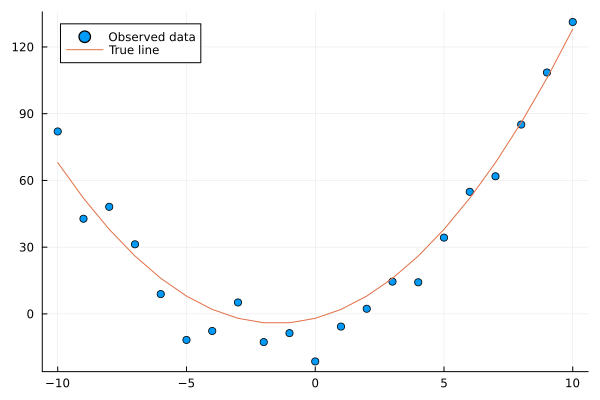

In [40]:
scatter(x,y_observed, label = "Observed data")
plot!(x,y_true, label = "True line")

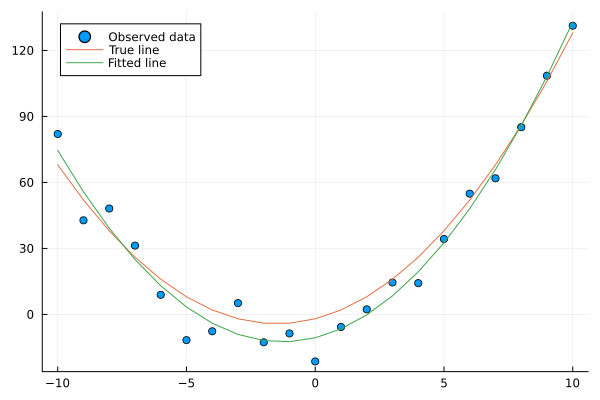

In [41]:
using Polynomials
line_fit = Polynomials.fit(x,y_observed,2)
fit_coeff = coeffs(line_fit)
y_fitted = fit_coeff[1] .+ fit_coeff[2] .* x .+ fit_coeff[3] .*x.^2
plot!(x,y_fitted,label="Fitted line")

### 2.4

1. Repeat 2.2 and 2.3 with a noise with a standard deviation of 50

In [42]:
using Distributions, Polynomials, Statistics, Plots
dataerr2 = 50.0
d2 = di.Normal(0,dataerr2)
y_observed2 = y_true .+ rand(d2,length(x))

21-element Vector{Float64}:
  29.889586088050528
  -7.95782076065224
 -28.041022419704518
  61.0108106401537
  73.17052900558966
  33.85077683843119
  -3.2712393100683395
  11.754172264461474
   5.728340875334872
 -89.11218789697992
 -37.01055813500902
  19.95201372844361
 -16.880236588431828
  22.469457844023573
  66.80090534120832
  60.64519916781329
  60.23702776551963
 102.34350048771375
  87.26618695511137
  74.57525033182907
 139.31982994902668

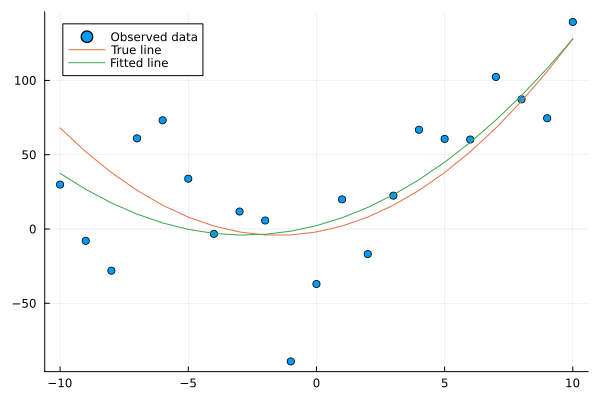

In [43]:
scatter(x,y_observed2, label = "Observed data")
plot!(x,y_true, label = "True line")

using Polynomials
line_fit2 = Polynomials.fit(x,y_observed2,2)
fit_coeff = coeffs(line_fit2)
y_fitted2 = fit_coeff[1] .+ fit_coeff[2] .* x .+ fit_coeff[3] .*x.^2
plot!(x,y_fitted2,label="Fitted line")

2. Compare the plot with the plot in 2.3. Is the fit closer to y_true or not, and why?

The plot in 2.3 seems to fit closer to y_true than the plot from 2.4. This makes sense, since the standard deviation was increased in 2.4, meaning that there was a larger noise.

### 2.5

#### Repeat 2.2 and 2.3 with a tenth order polynomial fit


In [44]:
using Distributions, Polynomials, Statistics, Plots
dataerr3 = 10.0
d3 = di.Normal(0,dataerr3)
y_observed3 = y_true .+ rand(d3,length(x))

21-element Vector{Float64}:
  77.53702162149413
  60.002272685236434
  28.245106257484963
  29.339645890614797
   7.0859328055793345
  14.538000050576688
 -10.990927229617935
  -7.924069794511708
  -9.988768051086602
 -12.876986260744337
  11.526425806161528
   2.302536773958712
  23.600989479788872
   8.46530423519891
  39.95213368615006
  36.48043148903984
  52.70288133597935
  66.80175702724553
  86.14694988134299
 103.12135853597158
 131.44124088308703

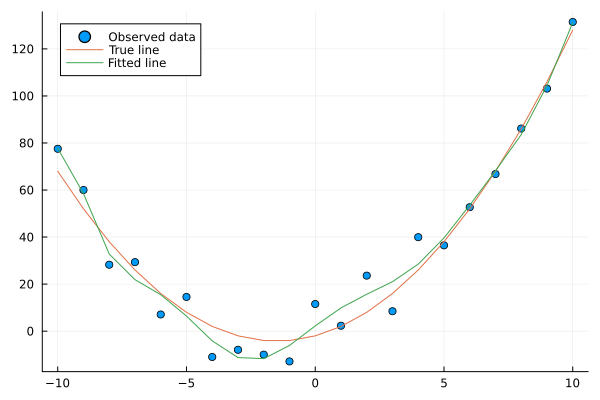

In [45]:
scatter(x,y_observed3, label = "Observed data")
plot!(x,y_true, label = "True line")

using Polynomials
line_fit3 = Polynomials.fit(x,y_observed3,10)
fit_coeff = coeffs(line_fit3)
y_fitted3 = line_fit3.(x)
plot!(x,y_fitted3,label="Fitted line")

### 2.6

1. Create a new independent parameter x_fit ranging from -11 to 11 with an increment of 0.1
2. Plot the same three plots as in 2.3 again but apply the tenth order polynomial to x_fit instead of x


In [46]:
using Distributions, Polynomials, Statistics, Plots
dataerr4 = 10.0
d4 = di.Normal(0,dataerr4)
y_observed4 = y_true .+ rand(d4,length(x))

21-element Vector{Float64}:
  78.10677001882603
  71.78512942746596
  10.528493821585755
  11.028389118818232
  28.89712491712809
  14.639931897123866
  -7.703903417720179
 -17.61619661791019
  -6.547772530567628
 -10.09532745667324
   4.314304643175008
   2.9115822243720935
   4.67041661005314
  26.159988179692625
  24.4548356606318
  37.14684835072857
  33.32813578585642
  60.79142384535772
  92.80503879683582
  99.94544504522527
 112.78771623782842

In [47]:
x_fit = -11:0.1:11

-11.0:0.1:11.0

In [48]:
collect(x_fit)

221-element Vector{Float64}:
 -11.0
 -10.9
 -10.8
 -10.7
 -10.6
 -10.5
 -10.4
 -10.3
 -10.2
 -10.1
 -10.0
  -9.9
  -9.8
   ⋮
   9.9
  10.0
  10.1
  10.2
  10.3
  10.4
  10.5
  10.6
  10.7
  10.8
  10.9
  11.0

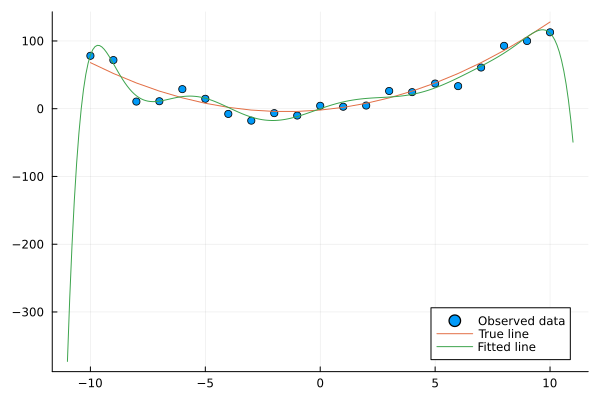

In [49]:
scatter(x,y_observed4, label = "Observed data")
plot!(x,y_true, label = "True line")

using Polynomials
line_fit4 = Polynomials.fit(x,y_observed4,10)
fit_coeff = coeffs(line_fit4)
y_fitted4 = line_fit4.(x_fit)
plot!(x_fit,y_fitted4,label="Fitted line")

3. What do you observe in the plot? What is this phenomenon called?

I can observe in the plot that the fitted line fits almost perfectly with the data points. This phenomenon is called "overfitting."